## Numerical Integration
In the code below, the 4th order Runge-Kutta method is used to numerically integrate the second order differential equations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


In [2]:
def rk4(f,t,h,g):
    k1 = h*g(t,f)
    k2 = h*g(t+0.5*h, f+0.5*k1)
    k3 = h*g(t+0.5*h, f+0.5*k2)
    k4 = h*g(t+h, f+k3)
    return f+ k1/6. + k2/3. + k3/3. + k4/6.

In [3]:
def RHS(t,f):#defining the right hand side of the equations of motion
    j,a,c,m=3/4,1,1,0.1 #list of parameters
    phi=f[0]#phi is the scalar field
    phidot=f[1]
    hh=f[2]#hh is Hubble's constant
    RHS=np.array([phidot,-((5*phi)/a) - 4*hh*phidot - (20*j*hh ** 2)/(a*c*m),(4*hh**2*j + c*m*phi + a*c*hh*m*phidot)/(8*j)])
    return RHS

The function defined below takes initial values for $\phi$ and $H$ at "tstart" and integrates until "tstop". It returns a list of values for $\phi$, $\dot\phi$, and $H$ at different times. 

In [4]:
def Solver(phi_initial,phidot_initial,hh_initial, tstart, tstop, h, RHS):
    f0=[phi_initial,phidot_initial,hh_initial]
    f_old = f0
    phi=[f0[0],]
    phidot=[f0[1],]
    hh=[f0[2],]
    t=[tstart,]
    while t[-1] < tstop:
        f_old = rk4(f_old,t[-1],h,RHS)
        phi.append(f_old[0])
        phidot.append(f_old[1])
        hh.append(f_old[2])
        t.append(t[-1]+h)
    return np.array(phi),np.array(phidot),np.array(hh),np.array(t)

In the code below, the time range for integration is only $150 t_p$ and the timestep of integration is chosen to be $0.1 t_p$. This is because according to inflation theory, the inflation of the universe lasted for a very short amount of time on the scale of a couple plank time units. Moreover, the numerical solution assumes the initial value for the first order time derivative of inflation to be zero. Furthermore, the Hubble's constant is assumed to be around $0.1 t_p^{-1}$ by taking into account the rapid expansion of the universe following the big bang. The choice for the initial value of the scalar field is made so that the scalar field oscillates about a value of zero, as predicted by inflation theory. Note that any value for the initial value of $\phi$ above the one chosen below is unstable, meaning it will not dissipate to a value of zero.  

Text(0, 0.5, 'Phi')

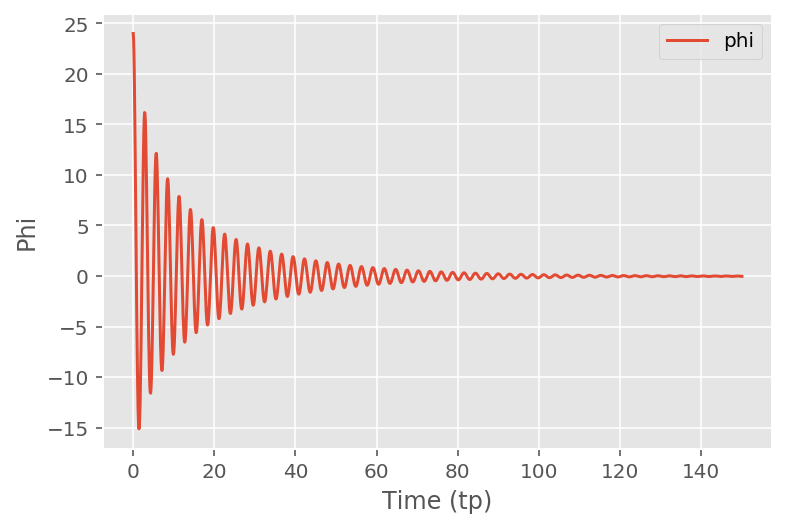

In [5]:
phi,phidot,hh,t=Solver(24,0,0.1,0, 150, 0.1, RHS)#the arguments are phi_initial,phidot_initial,hh_initial, tstart, tstop, h(timestep), RHS, respectively
plt.style.use('ggplot')
plt.plot(t,phi,label="phi")
plt.legend(loc="upper right")
plt.xlabel("Time (tp)")
plt.ylabel("Phi")

The results for the scalar field, as seen in the graph above, fit well with the assumption that the scalar field disspitates throughout time. In this regard, the set of scalar field equations of motion that was used can be a possible candidate for modeling inflation. Furthermore, the values for the Hubble constant that are found further support this assumption. As shown in the graph below, the Hubble's constant value begins at a very large value but then attains a smaller value as time goes on. This is coherent with the proposed inflation theory which states that the expansion of the universe is very fast shortly after the begining of inflation and attains a smaller, relatively constant value as time progresses. 

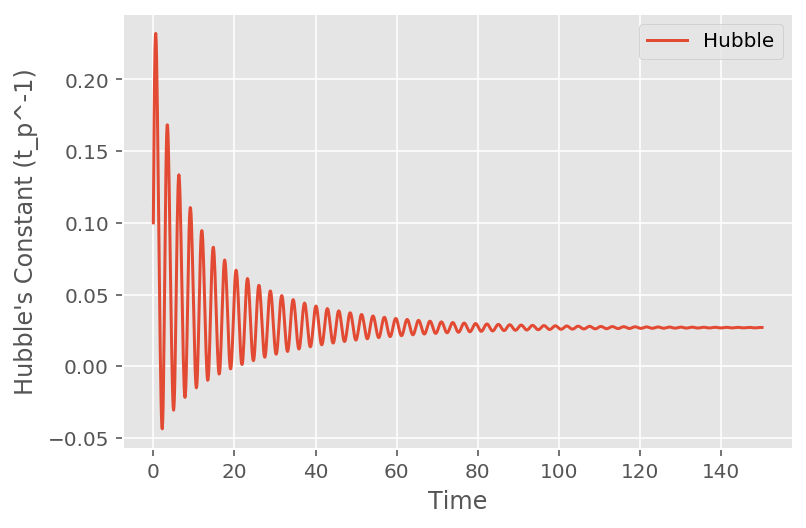

In [6]:
plt.plot(t,hh,label="Hubble")
plt.xlabel("Time")
plt.ylabel("Hubble's Constant (t_p^-1)")
plt.legend(loc="upper right")


## Period of Oscillation
It can also be seen that the period of oscillation of the scalar field is similar to that of the Hubble's constant. The code below shows a method to calculate the period for the scalar field and Hubble's constant. It then shows that the periods are equal. 

In [7]:
from numpy import *
def period(x,t):#calculates the period for a given data set
    x_min_index=(diff(sign(diff(x))) > 0).nonzero()[0] + 1#this return the position of local minimum values
    t_at_x_min=t[x_min_index]#time at minima
    period= diff(t_at_x_min)#time difference between two minima
    return period

In [8]:
phi_period=period(phi,t)
hh_period=period(hh,t)
period_ratio=sum(phi_period/hh_period)/len(hh_period)
print(period_ratio)

1.0007578628268285


## Unstable Results
As discussed earlier, initial values of $\phi$ that are larger than the one used in the previous solution is bound to be unstable. For instance, consider the graph below, where a slightly larger initial value of phi is used. As shown in the figure, the scalar field reduces before increasing exponentially. Similarly the Hubble's constant value approaches a relatively small and constant value before it starts decreasing exponentially. For these reasons, the initial value of $\phi$ is constrained to some maximum value above which the solution is unstable.  

Text(0, 0.5, 'phi')

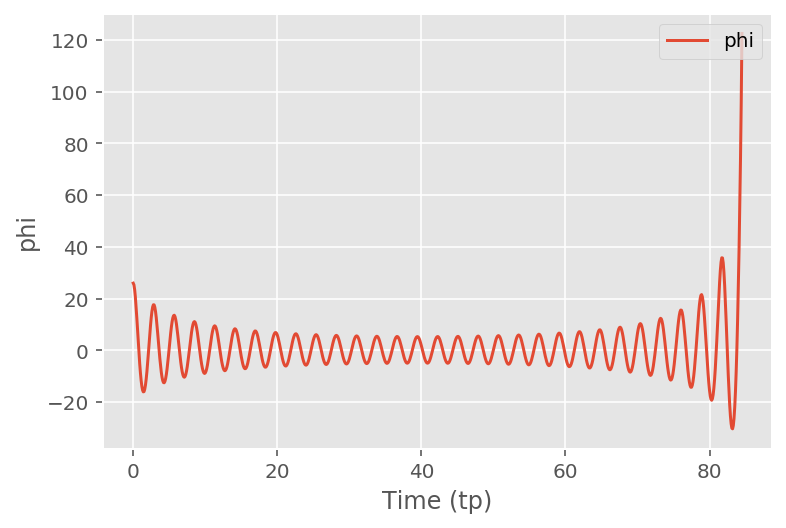

In [9]:
phi,phidot,hh,t=Solver(26,0,0.1,0, 84.4, 0.1, RHS)
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.plot(t,phi,label="phi")
plt.legend(loc="upper right")
plt.xlabel("Time (tp)")
plt.ylabel("phi")

Text(0, 0.5, "Hubble's Constant (t_p^-1)")

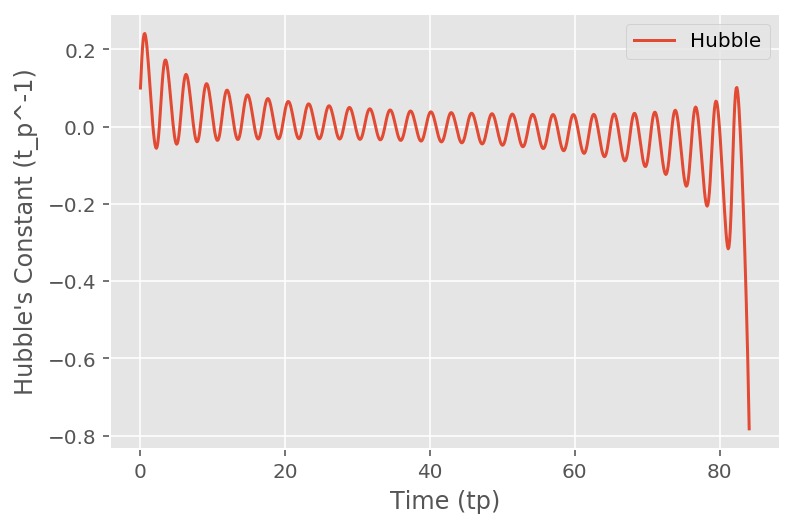

In [10]:
phi,phidot,hh,t=Solver(26,0,0.1,0, 84, 0.1, RHS)
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.plot(t,hh,label="Hubble")
plt.legend(loc="upper right")
plt.xlabel("Time (tp)")
plt.ylabel("Hubble's Constant (t_p^-1)")

## Conclusion
The scalar field equations of motion used in this paper have the potential to model an inflationary period in the expansion of the universe. The scalar field displays a stable oscillatory behavior  for a specific set of values, above which it becomes unstable. Moreover, the amplitude of the scalar field diminishes across time, which is expected to happen according to inflation theory. Lastly, the results for the Hubble's constant shows the universe expanding at different rates in phase with the scalar field. As expected, the Hubble's constant acquires a smaller constant value as time goes on, indicating that the universe attained a relatively constant rate of expansion after inflation took place. 







## Citation
Whiting, Catherine. Inflationary Cosmology from Dynamical Projective Connections. 2019, 

Samuel Brensinge, Kenneth Heitritter, Vincent G. J. Rodgers, Kory Stiffler, Catherine A. Whiting. String Theory Inspired Thomas Whitehead Gravity as a Source for Dark Energy, Dark Matter. 2019